In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


In [2]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/nyc.csv.zip'
nyc = pd.read_csv(path_to_file, compression = 'zip', encoding='ISO-8859-1')
nyc

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [ ]:
Представьте, что вы аналитик в сервисе такси. 
Ваша задача – написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия 
и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием.

Таким образом, сама функция haversine() должна принимать на вход 5 параметров, один из которых должен иметь значение по умолчанию.

In [ ]:
# написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), 
# создать колонку distance с подсчитанным расстоянием


In [4]:
# y1 - pickup_latitude
# y2 - dropoff_latitude
# x1 - pickup_longitude
# x2 - dropoff_longitude
def haversine(x1, y1, x2, y2, radius=6371):
    x1, x2, y1, y2 = map(np.radians, [x1, x2, y1, y2])  # переводим в радианы
    dif_lon = x2-x1                                     # разница долготы
    dif_lat = y2-y1                                     # разница широты
    
    a = np.sin(dif_lat/2.0)**2 + np.cos(y1) * np.cos(y2) * np.sin(dif_lon/2.0)**2
    c = np.arcsin(np.sqrt(a))
    d = 2 * radius * c
    return d

In [6]:
%%time
dist = [ ]
for i, row in nyc.iterrows():
    dist.append(haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']))
nyc['distance'] = dist
nyc['distance']

CPU times: user 6.32 s, sys: 15.7 ms, total: 6.34 s
Wall time: 6.34 s


0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: distance, Length: 50000, dtype: float64

In [7]:
# компактный вариант

nyc['distance'] = pd.Series(haversine(row.pickup_longitude, 
                                      row.pickup_latitude, 
                                      row.dropoff_longitude, 
                                      row.dropoff_latitude) for i, row in nyc.iterrows())
nyc['distance']

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: distance, Length: 50000, dtype: float64

In [29]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [ ]:
Давайте попробуем еще один метод, pd.itertuples, который на каждой итерации возвращает именованный кортеж (named tuple) для каждой строки датафрейма. 
Параметр index по умолчанию равен True, поэтому первым элементом кортежа следует индекс, далее — содержимое строки.

Обратите внимание, что, в отличие от первого метода, строка возвращается уже не как Series:

In [22]:
for row in nyc[:1].itertuples(name='ride'):  # исп. "ride" как название
    print(f"Тип содержимого: {type(row)}")

Тип содержимого: <class 'pandas.core.frame.ride'>


In [23]:
# Посмотрим на формат вывода:

for row in nyc[:3].itertuples(name='custom_name'):
    print(row)
    print()

custom_name(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime='2009-06-15 17:26:21 UTC', pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.71227800000001, passenger_count=1, distance=1.0307639350481281)

custom_name(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime='2010-01-05 16:52:16 UTC', pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1, distance=8.450133595805992)

custom_name(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime='2011-08-18 00:35:00 UTC', pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2, distance=1.3895252257697308)



In [24]:
# Индекс и число пассажиров для первых трех наблюдений:

for row in nyc[:3].itertuples():
    print("Индекс {}; Число пассажиров: {}".format(row.Index, row.passenger_count))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2


In [18]:
#  Задача: проделайте ту же операцию, что и в предыдущем шаге, но уже используя pd.itertuples()

%%time
nyc['distance'] = pd.Series(haversine(x.pickup_longitude, 
                                      x.pickup_latitude, 
                                      x.dropoff_longitude, 
                                      x.dropoff_latitude) for x in nyc.itertuples())
nyc['distance']

CPU times: user 942 ms, sys: 2.58 ms, total: 944 ms
Wall time: 941 ms


0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: distance, Length: 50000, dtype: float64

In [ ]:
Еще один часто используемый метод pd.apply() применяет заданную функцию вдоль определенной оси (axis=0 – строки; axis=1 – столбцы), 
и является более эффективным способом, чем pd.iterrows() за счет использования внутренних оптимизаций в pandas. 
Тем не менее, все равно подразумевает итерацию по всем рядам.

In [25]:
%%time
nyc['distance'] = nyc[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] \
                 .apply(lambda x: haversine(x[0], x[1], x[2], x[3]), axis=1)

CPU times: user 1.63 s, sys: 19.3 ms, total: 1.65 s
Wall time: 1.64 s


In [26]:
%%time
nyc['distance'] = nyc.apply(lambda x: haversine(x.pickup_longitude,
                                                x.pickup_latitude, 
                                                x.dropoff_longitude, 
                                                x.dropoff_latitude), axis=1)

CPU times: user 2.78 s, sys: 11.2 ms, total: 2.79 s
Wall time: 2.79 s


In [4]:
%%time
nyc['distance'] = nyc.apply(lambda x: haversine(x['pickup_longitude'], 
                                                x['pickup_latitude'],
                                                x['dropoff_longitude'], 
                                                x['dropoff_latitude']), axis=1)

CPU times: user 1.76 s, sys: 20.5 ms, total: 1.78 s
Wall time: 1.78 s


In [5]:
#  самое большое расстояние

longest = nyc.distance.max()
longest

8667.818812217458

In [7]:
%%time
nyc['distance'] = haversine(nyc['pickup_longitude'], nyc['pickup_latitude'], nyc['dropoff_longitude'], nyc['dropoff_latitude'])
nyc['distance'] 

CPU times: user 21.2 ms, sys: 11 µs, total: 21.2 ms
Wall time: 19.5 ms


0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: distance, Length: 50000, dtype: float64

In [ ]:
В качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, 
чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. 
Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции. 

In [9]:
%%time
#  df['new'] = haversine(df['col1'].values, df['col2'].values, df['col3'].values, df['col4'].values)

nyc['distance'] = haversine(nyc.pickup_longitude.values, 
                            nyc.pickup_latitude.values, 
                            nyc.dropoff_longitude.values, 
                            nyc.dropoff_latitude.values)

CPU times: user 19 ms, sys: 0 ns, total: 19 ms
Wall time: 17.9 ms


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [14]:
# кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули

nyc.query("(dropoff_longitude == 0) or (dropoff_latitude == 0)").count()

key                  958
fare_amount          958
pickup_datetime      958
pickup_longitude     958
pickup_latitude      958
dropoff_longitude    958
dropoff_latitude     958
passenger_count      958
distance             958
dtype: int64

In [ ]:
Null Island! Координаты этого объекта часто используются в картографических системах для отслеживания ошибок.

Предположим, наша цель всё ещё состоит в поиске самых дальних поездок. 
Естественно, текущие данные совсем не годятся — некоторые такси, согласно данным, уезжают и приезжают из океана. 
Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, 
и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-

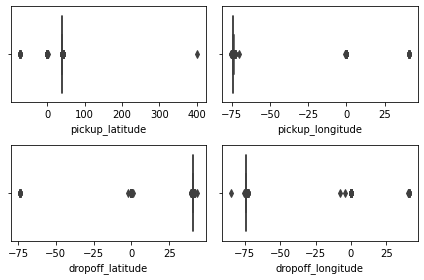

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sns.boxplot(nyc.pickup_latitude, ax=axes.flatten()[0])
sns.boxplot(nyc.pickup_longitude, ax=axes.flatten()[1])
sns.boxplot(nyc.dropoff_latitude, ax=axes.flatten()[2])
sns.boxplot(nyc.dropoff_longitude, ax=axes.flatten()[3])
plt.tight_layout()

In [ ]:
#  Решение:
#  10 < pickup_latitude < 120, pickup_longitude < -60, 10 < dropoff_latitude, dropoff_longitude < -60,

In [19]:
# отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку

# максимальная удаленность пунктов друг от друга не должна превышать 50 километров, 
# иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.

nyc_2 = (nyc.query("(pickup_longitude < -60) and \
                   (pickup_latitude < 120) and \
                   (pickup_latitude > 10) and  \
                   (dropoff_latitude > 10) and \
                   (dropoff_longitude < -60) and \
                   (distance < 50)") \
                   .reset_index(drop=True))
nyc_2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [20]:
# Найти сумму, которую заплатил пассажир, проехавший наибольшее расстояние.

longest_2 =  nyc_2.distance.idxmax()
longest_2

32795

In [23]:
#  nyc_2.loc[longest_2].fare_amount

nyc_2.query("distance == @nyc_2.distance.max()")

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
32795,2014-02-22 02:44:00.00000052,136.0,2014-02-22 02:44:00 UTC,-73.98954,40.757032,-73.86058,41.147487,1,44.746988


In [24]:
nyc_2.query("distance == @nyc_2.distance.max()").fare_amount

32795    136.0
Name: fare_amount, dtype: float64